<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>


# Task - 8 Next Word Prediction

##### ***Author: Saumya Gupta, Data Science Intern at LetsGrowMore***


Using Tensorflow and Keras library train a RNN, to predict the next word.

**Link for the dataset:** https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

**References:** https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/


# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import heapq
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import pickle


#Loading the dataset

In [3]:
path = '/content/drive/MyDrive/Next Word Prediction/1661-0.txt'
#Reading the datset using open() method and then converting it into lowercase
Data = open(path, "r" ,encoding  = 'utf8').read().lower()


### Displaying the dataset

In [4]:
Data

'\ufeff\nproject gutenberg\'s the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nrelease date: november 29, 2002 [ebook #1661]\nlast updated: may 20, 2019\n\nlanguage: english\n\ncharacter set encoding: utf-8\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\ncover\n\n\n\nthe adventures of sherlock holmes\n\n\n\nby arthur conan doyle\n\n\n\ncontents\n\n\n   i.     a scandal in bohemia\n   ii.    the red-headed league\n   iii.   a case of identity\n   iv.    the boscombe valley mystery\n   v.     the five orange pips\n   vi.    the man wi

###Finding the length of data

In [5]:
Corpus_length = len(Data)
print('Corpus length is :', Corpus_length)

Corpus length is : 581888


###Printing the lines in the text file

In [6]:
file = open(path, "r", encoding = "utf8")
lines = []

for line in file:
    lines.append(line)
    
print(lines)

['\ufeff\n', "Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n", '\n', 'This eBook is for the use of anyone anywhere at no cost and with\n', 'almost no restrictions whatsoever.  You may copy it, give it away or\n', 're-use it under the terms of the Project Gutenberg License included\n', 'with this eBook or online at www.gutenberg.net\n', '\n', '\n', 'Title: The Adventures of Sherlock Holmes\n', '\n', 'Author: Arthur Conan Doyle\n', '\n', 'Release Date: November 29, 2002 [EBook #1661]\n', 'Last Updated: May 20, 2019\n', '\n', 'Language: English\n', '\n', 'Character set encoding: UTF-8\n', '\n', '*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n', '\n', '\n', '\n', 'Produced by an anonymous Project Gutenberg volunteer and Jose Menendez\n', '\n', '\n', '\n', 'cover\n', '\n', '\n', '\n', 'The Adventures of Sherlock Holmes\n', '\n', '\n', '\n', 'by Arthur Conan Doyle\n', '\n', '\n', '\n', 'Contents\n', '\n', '\n', '   I.     A Sc

### Tokenizing the data using RegexTokenizer

In [7]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(Data)

In [8]:
print(words[:20], sep = " ")

['project', 'gutenberg', 's', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone']


### Finding unique words and unique characters

In [9]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [10]:
print(unique_word_index, sep = " ")

{'0': 0, '000': 1, '1': 2, '10': 3, '100': 4, '1000': 5, '10_s_': 6, '10th': 7, '11': 8, '117': 9, '120': 10, '12_s_': 11, '12th': 12, '14': 13, '140': 14, '15': 15, '150': 16, '1500': 17, '1661': 18, '16a': 19, '17': 20, '1846': 21, '1858': 22, '1869': 23, '1870': 24, '1878': 25, '1883': 26, '1884': 27, '1887': 28, '1888': 29, '1890': 30, '19th': 31, '1_s_': 32, '2': 33, '20': 34, '200': 35, '2001': 36, '2002': 37, '2019': 38, '220': 39, '221b': 40, '226': 41, '22nd': 42, '249': 43, '25': 44, '250': 45, '26': 46, '26_s_': 47, '27': 48, '270': 49, '29': 50, '2_s_': 51, '2nd': 52, '3': 53, '30': 54, '31': 55, '35': 56, '3rd': 57, '4': 58, '40': 59, '4000': 60, '421': 61, '4700': 62, '4_d_': 63, '4th': 64, '4½': 65, '5': 66, '50': 67, '501': 68, '596': 69, '6': 70, '60': 71, '6221541': 72, '64': 73, '6_d_': 74, '7': 75, '700': 76, '750': 77, '750175': 78, '77': 79, '7_s_': 80, '7th': 81, '8': 82, '801': 83, '809': 84, '82': 85, '83': 86, '84': 87, '84116': 88, '85': 89, '87': 90, '88': 9

In [11]:
character = sorted(list(set(Data)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))

#Printing number of unique characters
print(f'unique chars: {len(character)}')

unique chars: 73


### Finding the number of training examples

In [38]:
sequence_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(Data) - sequence_len, step):
    sentences.append(Data[i: i + sequence_len ])
    next_chars.append(Data[i + sequence_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


# Generating features and labels using one-hot encoding

In [15]:
X = np.zeros((len(sentences), sequence_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [16]:
sentences[124]

'\nauthor: arthur conan doyle\n\nrelease dat'

In [17]:
next_chars[100]

'e'

### Printing the one hot encoded data

In [18]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [19]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### Shape of X and Y

In [20]:
X.shape

(193950, 40, 73)

In [21]:
y.shape

(193950, 73)

# Creating the RNN Model

In [22]:
model = Sequential()
model.add(LSTM(128, input_shape=(sequence_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Sumamry and Plot of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


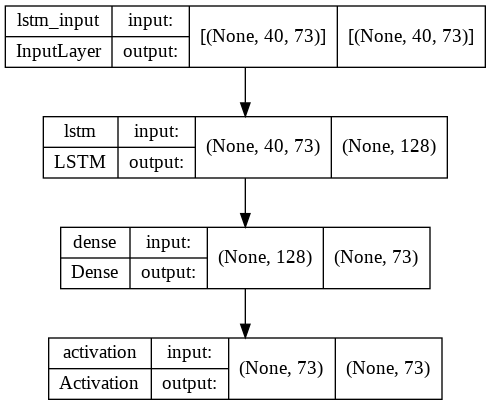

In [23]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')


### Training the model

In [24]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.01, batch_size=128, epochs=50, shuffle=True).history


Epoch 1/50
1501/1501 [==============================] - 198s 130ms/step - loss: 1.9736 - accuracy: 0.4201 - val_loss: 2.2211 - val_accuracy: 0.4000
Epoch 2/50
1501/1501 [==============================] - 193s 129ms/step - loss: 1.6213 - accuracy: 0.5155 - val_loss: 2.0866 - val_accuracy: 0.4206
Epoch 3/50
1501/1501 [==============================] - 189s 126ms/step - loss: 1.5212 - accuracy: 0.5435 - val_loss: 2.0492 - val_accuracy: 0.4675
Epoch 4/50
1501/1501 [==============================] - 190s 126ms/step - loss: 1.4700 - accuracy: 0.5560 - val_loss: 2.0019 - val_accuracy: 0.4686
Epoch 5/50
1501/1501 [==============================] - 189s 126ms/step - loss: 1.4357 - accuracy: 0.5664 - val_loss: 1.9834 - val_accuracy: 0.4753
Epoch 6/50
1501/1501 [==============================] - 198s 132ms/step - loss: 1.4111 - accuracy: 0.5715 - val_loss: 2.0210 - val_accuracy: 0.4809
Epoch 7/50
1501/1501 [==============================] - 190s 127ms/step - loss: 1.3916 - accuracy: 0.5774 - val_

### Saving the model

In [25]:
model.save('word_prediction_model.h5')
pickle.dump(history, open("history.p", "wb"))


###Loading the model

In [26]:

model = load_model('word_prediction_model.h5')
history = pickle.load(open("history.p", "rb"))

### Model evaluation on the basis of Test Loss and Test Accuracy

In [28]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 100s 16ms/step - loss: 1.2029 - accuracy: 0.6291
Test Loss 1.2028825283050537
Test Accuracy 0.6291002631187439


### Plotting the graph between Training & Validation accuracy and Training & Validation loss

In [30]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


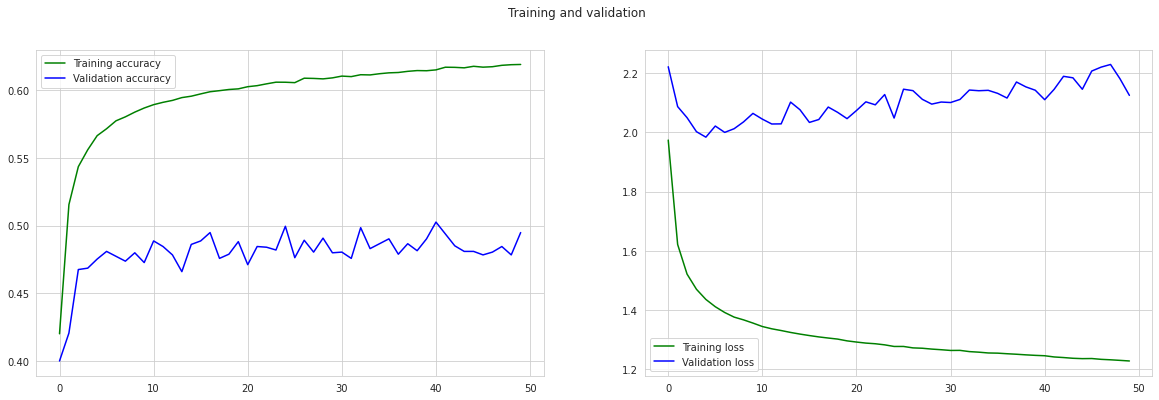

In [47]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()


# Testing Next Word Prediction Model

### Creating a function to prepare the input

In [39]:
def prepare_input(text):
    x = np.zeros((1, sequence_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [40]:
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Creating a function to return samples

In [41]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)


### Creating functions for next word prediction

In [42]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion


In [43]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]


### Making prediction

In [44]:
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]

In [45]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()
    


deep learning is subset of machine learn
[' the ', 'ed ', 'ing ', '\nthe ', '.”\n\n“what ']

machine learning  is the study of comput
['e ', 'ing ', 'her ', ' the ', 'tene ']

it is not a lack of love, but a lack of 
['the ', 'his ', 'my ', 'bride, ', 'supplies ']

recurrent neural network (rnn) is a type
['wrsons ', 'crid ', 'rton ', 'mble ', ', ']

thanks for spending your precious time t
['o ', 'hat ', 'erse ', 'raced ', 'ill ']



## Thank You!